# Meet IT Toruń #2

## Statystyki transakcji na allegro w dniach 8.02 - 14.02

In [49]:
%matplotlib inline
from pyspark.sql.functions import *

In [ ]:
transactions = sqlContext.read.parquet("transactions_week").cache()

In [50]:
transactions.printSchema()
transactions.count()

root
 |-- date: timestamp (nullable = true)
 |-- itemId: long (nullable = true)
 |-- name: string (nullable = true)
 |-- price: decimal(10,2) (nullable = true)
 |-- seller: string (nullable = true)
 |-- categoryId: long (nullable = true)
 |-- categories: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- attributes: map (nullable = true)
 |    |-- key: string
 |    |-- value: array (valueContainsNull = true)
 |    |    |-- element: string (containsNull = true)



3185232

## Najpopularniejszy przedmiot

In [54]:
transactions.groupBy('itemId') \
    .agg(count('*'), first('name')) \
    .orderBy(desc('count(1)')).show(truncate=False)

+----------+--------+--------------------------------------------------+
|itemId    |count(1)|first(name)()                                     |
+----------+--------+--------------------------------------------------+
|5969695871|770     |1000 Coinsy CSGODOUBLE! Od FIRMY! Pewniak 100%    |
|5960737558|634     |PLAYSTATION PLUS 14 DNI PS3 PS4 FIRMA AUTOMAT 24H7|
|5453310670|580     |CATSHARE.NET 30  DNI + +GWARANCJA+AUTOMAT 60SEK   |
|5968567670|522     |1000 /COINSY CSGODOUBLE /PEWNA FIRMA! CS:GO KLUCZE|
|5933181572|502     |P NIESAMOWICIE SEKSOWNE LEGGINSY PUSH UP HIT P734 |
|5872085932|409     |PROMOCJA CHOMIKUJ 5 GB TRANSFER AUTOMAT 48        |
|5836564126|407     |KOŃCÓWKI DO SZCZOTECZKI ORAL-B I 3D WHITE 8 SZTUK |
|5960570296|370     |PAYSAFECARD 50ZŁ PROMOCJA AUTOMAT 24/7 2 MINUTY ! |
|5794943389|369     |VILEDA MOP OBROTOWY Easy Wring and Clean SPIN MOP |
|5735073662|362     |ZESTAW XXL 7x SEMILAC LAMPA LED Mostek 9W - HIT   |
|5960552581|362     |PAYSAFECARD 20ZŁ PROMOCJA AUTO

## Najpopularniejsza kategoria

In [56]:
transactions.groupBy('categories') \
    .agg(count('*')).orderBy(desc('count(1)')).toPandas()

,categories,count(1)
0,"[Dom i Ogród, Wyposażenie, Oświetlenie, Źródła...",21581
1,"[Telefony i Akcesoria, Akcesoria GSM, Folie oc...",21375
2,"[Dom i Ogród, Ogród, Rośliny, Nasiona, Warzywa]",16097
3,"[Odzież, Obuwie, Dodatki, Odzież damska, Sukie...",15978
4,"[Odzież, Obuwie, Dodatki, Odzież damska, Bluzki]",14157
5,"[Uroda, Manicure i pedicure, Ozdoby]",14130
6,"[Uroda, Manicure i pedicure, Lakiery hybrydowe]",13015
7,"[Uroda, Makijaż, Twarz, Podkłady]",12523
8,"[Telefony i Akcesoria, Akcesoria GSM, Pokrowce...",11852
9,"[Dom i Ogród, Wyposażenie, Oświetlenie, Lampy]",10920


In [59]:
transactions \
    .where(array_contains('categories', 'Źródła światła')) \
    .withColumn('kind', col('attributes')['Rodzaj'][0]) \
    .groupBy('kind').agg(count('*'), avg('price')).show(truncate=False)

+---------------------+--------+----------+
|kind                 |count(1)|avg(price)|
+---------------------+--------+----------+
|Świetlówki           |201     |16.286567 |
|Inne                 |322     |13.544689 |
|Tradycyjne żarówki   |425     |10.380753 |
|Świetlówki liniowe   |122     |14.145328 |
|LED                  |19605   |21.941483 |
|Halogenowe           |578     |20.131453 |
|Świetlówki kompaktowe|328     |13.425610 |
+---------------------+--------+----------+



## Który sprzedawca miał najwięcej obrotu?

In [61]:
transactions.groupBy('seller') \
    .agg(count("*"), avg('price'), sum('price')) \
    .orderBy(desc('count(1)')).show(truncate=False)

+----------------+--------+----------+----------+
|seller          |count(1)|avg(price)|sum(price)|
+----------------+--------+----------+----------+
|darmarsklep     |10948   |19.952975 |218445.17 |
|kosmetyki_ck    |10059   |7.461081  |75051.01  |
|Allegro         |9487    |185.191872|1756915.29|
|Aros_pl         |8391    |17.932931 |150475.22 |
|ezebra_pl       |8122    |14.023392 |113897.99 |
|HubiWorld       |7693    |17.479511 |134469.88 |
|Swiat____Dziecka|7113    |16.023987 |113978.62 |
|leobert         |6935    |24.017246 |166559.60 |
|korob_pl        |6604    |30.573539 |201907.65 |
|uroda-i-ty      |6555    |19.249286 |126179.07 |
|telmal_store    |6498    |10.359888 |67318.55  |
|niemchem_com    |5460    |20.690936 |112972.51 |
|FH-MarTom       |5449    |10.089712 |54978.84  |
|dlaauta         |5277    |37.911300 |200057.93 |
|bdsklep_pl      |5062    |33.198621 |168051.42 |
|X-KOM_PL        |5061    |557.823630|2823145.39|
|kwiaty-Isabell  |4648    |3.425344  |15921.00  |


## Ilość zakupów w głównych kategoriach

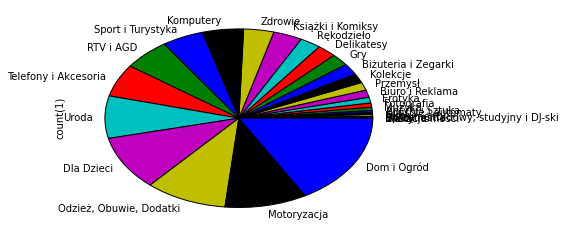

In [69]:
transactions \
    .withColumn('main_category', col('categories')[0]) \
    .groupBy('main_category').agg(count('*')) \
    .orderBy('count(1)').toPandas() \
    .set_index('main_category').plot(y='count(1)', kind='pie', legend=False)

## Rozkład cen przedmiotów poniżej 100 zł

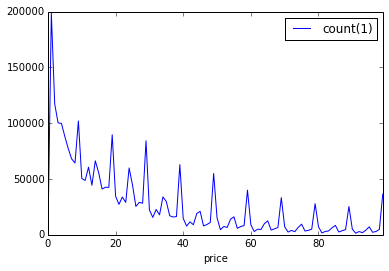

In [73]:
transactions \
    .select(col('price').cast('integer')) \
    .where(col('price') < 100) \
    .groupBy('price').agg(count('*')) \
    .orderBy('price').toPandas() \
    .set_index('price').plot(y='count(1)')